In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as pyplot

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

In [2]:
data = pd.read_csv('data/13-diabetes.csv', delimiter=',')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot:>

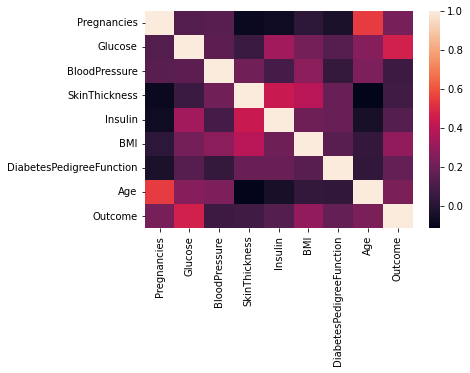

In [4]:
corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

In [5]:
# Prepare the test and training data sets
labels = data['Outcome']
features = data.iloc[:,0:8]

X = features
# labels is a column in a dataset. So we use the np.ravel() function to convert that to an array
y = np.ravel(labels) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, 
                                                    random_state=42) 

In [6]:
# Values normalization
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)  

## The Keras sequential model
<b>Activation function</b> takes that ((w • x) + b) and calculates a probability. Then it sets a threshold to determine whether the neuron ((w • x) + b) should be 1 (true) or (0) negative. 

For the first two layers we use a <b>relu (rectified linear unit)</b> activation function. relu is 1 for all positive values and 0 for all negative ones.

<b>input_shape</b> — we only have to give it the shape (dimensions) of the input on the first layer. It’s 8, since it’s a vector of 8 features. 

<b>Dense</b> — to apply the activation function over ((w • x) + b). The first argument in the Dense function is the number of hidden units, a parameter that you can adjust to improve the accuracy of the model. 

In [7]:
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(8,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 72        
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________


<b>loss</b> — the goal of the neural network is to minimize the loss function, i.e., the difference between predicted and observed values. We pick binary_crossentropy because our label data is binary (1) diabetic and (0) not diabetic.

<b>optimizer</b> — we use the optimizer function sgd, Stochastic Gradient Descent. It’s an algorithm designed to minimize the loss function in the quickest way possible. 

<b>epoch</b> — means how many times to run the model. 

<b>metrics</b> — means what metrics to display as it runs. <b>Accuracy</b> means how accurately the evolving model predicts the outcome.
    
<b>batch size</b> — <b>n</b> means divide the input data into n batches and process each in parallel.
    
<b>fit()</b> — trains the model, meaning calculates the weights, biases, number of layers, etc.


In [8]:
model.compile(loss = 'binary_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])
history = model.fit(X_train, y_train, epochs=4, batch_size=1, 
                    validation_data = (X_test, y_test))

Epoch 1/4
514/514 [==============================] - 2s 3ms/step - loss: 0.6045 - accuracy: 0.6401 - val_loss: 0.5771 - val_accuracy: 0.6890
Epoch 2/4
514/514 [==============================] - 1s 2ms/step - loss: 0.5322 - accuracy: 0.7160 - val_loss: 0.5369 - val_accuracy: 0.7402
Epoch 3/4
514/514 [==============================] - 1s 2ms/step - loss: 0.4946 - accuracy: 0.7412 - val_loss: 0.5201 - val_accuracy: 0.7362
Epoch 4/4
514/514 [==============================] - 1s 2ms/step - loss: 0.4768 - accuracy: 0.7568 - val_loss: 0.5076 - val_accuracy: 0.7520


In [9]:
# Evaluate the loss value & accuracy metrics for the model
eval_model_for_trainingData = model.evaluate(X_train, y_train)
eval_model_for_trainingData

17/17 [==============================] - 0s 2ms/step - loss: 0.4612 - accuracy: 0.7607


[0.4612153172492981, 0.7607004046440125]

In [10]:
eval_model_for_testData = model.evaluate(X_test, y_test)
eval_model_for_testData

8/8 [==============================] - 0s 1ms/step - loss: 0.5076 - accuracy: 0.7520


[0.5076287388801575, 0.751968502998352]

In [11]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

cm = confusion_matrix(y_test, y_pred)
print(cm)

8/8 [==============================] - 0s 1ms/step
[[140  28]
 [ 35  51]]


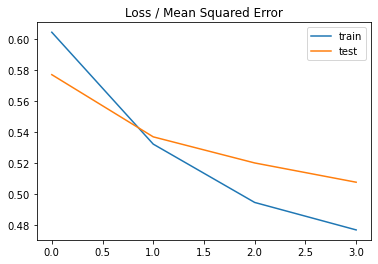

8/8 [==============================] - 0s 2ms/step
[[140  28]
 [ 35  51]]
8/8 [==============================] - 0s 2ms/step - loss: 0.5076 - accuracy: 0.7520


[0.5076287388801575, 0.751968502998352]

In [12]:
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

# Your input to confusion_matrix must be an array of int not one hot encodings.
y_pred = model.predict(X_test)
cf_matrix_k = confusion_matrix(y_test, (y_pred>0.5))
print(cf_matrix_k)

model.evaluate(X_test,y_test)